## Adaline

In [16]:
import pandas as pd
from data import *
plt.style.use('ggplot')

In [17]:
repetitions = 200
x_all = reproduce_x_times(x_unipolar, repetitions)
d_all = reproduce_x_times(d_bipolar, repetitions)
x_all = x_all + get_random_except_first_row(x_all.shape)
x_all[:, :5], d_all[:, :5]

(array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [-0.01088494,  0.00924801,  1.01290264,  1.00894555, -0.01411191],
        [-0.04568525,  0.95319644, -0.00130768,  0.96661489,  0.04721412]]),
 array([[-1, -1, -1,  1, -1]]))

In [18]:
test_size = int(x_all.shape[1] * 0.25)
train_size = int(x_all.shape[1] - test_size)
x_train, x_test = x_all[:, :train_size], x_all[:, train_size:]
d_train, d_test = d_all[:, :train_size], d_all[:, train_size:]
x_train.shape, x_test.shape, d_train.shape, d_test.shape

((3, 600), (3, 200), (1, 600), (1, 200))

In [19]:
x_range = np.arange(-2, 4)
experiments_numb = 1000

In [20]:
perceptrons = []
for allowed_err in list(np.linspace(0.3, 1, num=300)):
    p = Adaline(x_train, d_train, x_test, d_test, 0.0001, allowed_err, (-0.1, 0.1))
    for i in range(experiments_numb):
        p.count()
    perceptrons.append(p)
len(perceptrons)

300

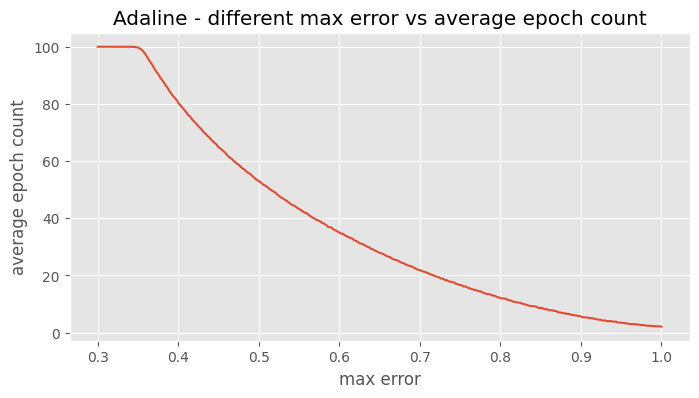

In [21]:
plt.gcf().set_size_inches(8, 4)
x, y = [x.allowed_error for x in perceptrons], [x.average_epoch_count for x in perceptrons]
plt.plot(x, y)
plt.title("Adaline - different max error vs average epoch count")
plt.xlabel("max error")
plt.ylabel("average epoch count")
pd.DataFrame({"max error":x, "epoch count":y});

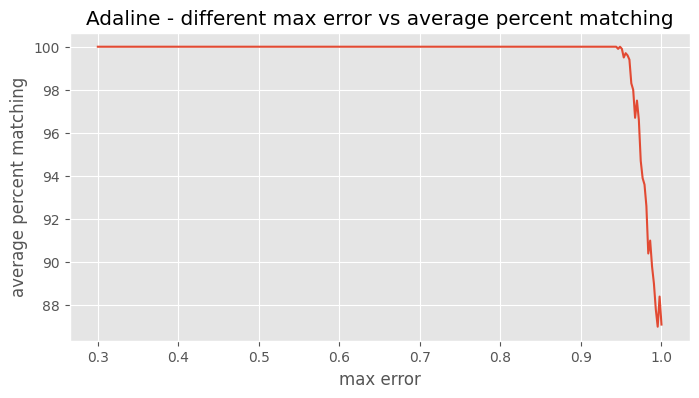

In [22]:
plt.gcf().set_size_inches(8, 4)
x, y = [x.allowed_error for x in perceptrons], [x.average_matching_percent for x in perceptrons]
plt.plot(x, y)
plt.title("Adaline - different max error vs average percent matching")
plt.xlabel("max error")
plt.ylabel("average percent matching");

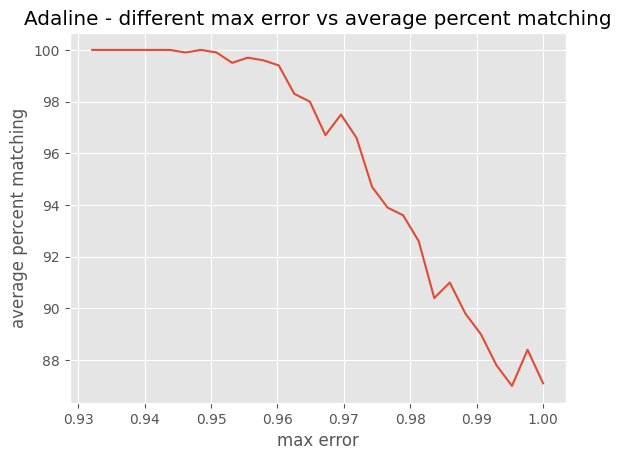

In [23]:
part_size = int(len(perceptrons) * 0.9)
x, y = [x.allowed_error for x in perceptrons][part_size:], [x.average_matching_percent for x in perceptrons][part_size:]
plt.plot(x, y)
plt.title("Adaline - different max error vs average percent matching")
plt.xlabel("max error")
plt.ylabel("average percent matching");